### Step 1: Import packages and Load data

In [1]:
import pandas as pd 
import os
import matplotlib.pyplot as plt

### Scenario
#### A department would like to have a sales report in the end of the year and it has to cover these ones:
   * Which month has the highest sale?
   * Which city has the highest sale?
   * What time should we display ads to maximize the likelihood of customer's buying product?
   * What products are most often sold together?
   * What products sold the most? Why do you think it sold the most?
#### Data Source
   * 12 Excel files for every single month in 2019.

#### Merge 12-month data

In [2]:
path = r'C:\Users\LENOVO\Desktop\Sales-Reporting-main\Sales-Reporting-main\data'
frames = []
for file in os.listdir(path):
    if file.endswith('.csv'):
        filepath = os.path.join(path,file)
        df1 = pd.read_csv(filepath)
        frames.append(df1)
        result = pd.concat(frames)
df = result
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [3]:
df.to_csv('annualSales2019.csv', index = False)

### Step 2: Clean and Preprocess data

#### 2.1: Look through data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 747400 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          745220 non-null  object
 1   Product           745220 non-null  object
 2   Quantity Ordered  745220 non-null  object
 3   Price Each        745220 non-null  object
 4   Order Date        745220 non-null  object
 5   Purchase Address  745220 non-null  object
dtypes: object(6)
memory usage: 39.9+ MB


#### 2.2: Add 'Month' column

In [5]:
df['Month'] = df['Order Date'].str.slice(start = 0, stop = 2, step = 1)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [6]:
print(set(df['Month'])) # Find unique value in Month column 

{nan, '01', '03', '10', '05', '06', '02', '12', '08', '11', 'Or', '04', '07', '09'}


#### 2.3: Get rid of 'Nan' and 'Or' value

In [7]:
df = df.dropna(how = 'all') #drop nan value
print(set(df['Month']))

{'01', '03', '10', '05', '06', '02', '12', '08', '11', 'Or', '04', '07', '09'}


In [8]:
df = df[df['Month'] != 'Or'] #drop 'Or' value
print(set(df['Month']))

{'01', '03', '10', '05', '06', '02', '12', '08', '11', '07', '04', '09'}


### Step 3. Reporting

In [9]:
# Create Sales Column
df['Quantity Orderd'] = pd.to_numeric(df['Quantity Ordered'], downcast = 'integer')
df['Price Each'] = pd.to_numeric(df['Price Each'], downcast = 'float' )

In [10]:
print(df['Quantity Orderd'].dtypes) #Check dtype
print(df['Price Each'].dtypes) #Check dtype

int8
float32


In [11]:
df['Sales'] = df['Quantity Orderd']*df['Price Each'] #Create Sales column
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Quantity Orderd,Sales
0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,1,700.000000
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,1,14.950000
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,2,23.980000
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,1,149.990005
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,1,11.990000


In [12]:
# Moving 'Sales' column 
moving_column = df.pop('Sales') 
df.insert(4, 'Sales', moving_column)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,Quantity Orderd
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,1
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,1
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,2
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,1
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,1


#### Which month has the highest sale?

In [19]:
# Find Sales by Month
sales_by_months = df.groupby('Month').sum()['Sales']
saels_by_months = sales_by_months.sort_values(ascending = False)

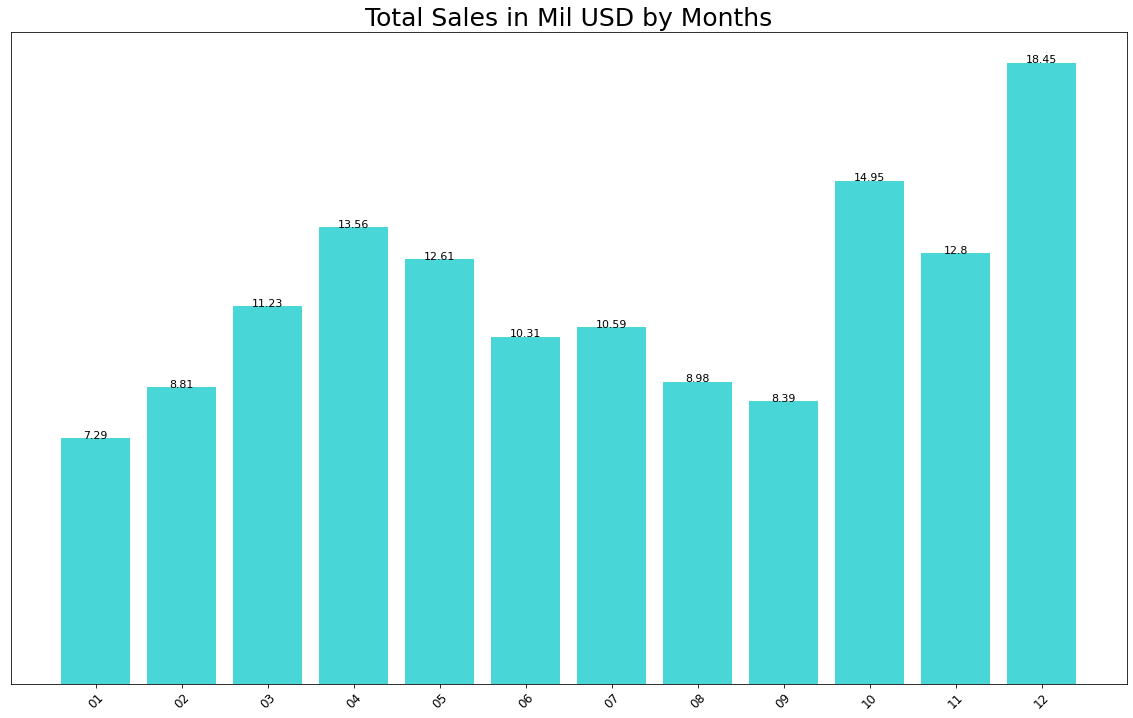

In [134]:
months = [month for month, sales in sales_by_months.items()]
sales = [sales for month, sales in sales_by_months.items()]
plt.figure (figsize = (20,12))
plt.bar(x = months, height = sales_by_months, color = (0.1, 0.8, 0.8, 0.8))
plt.xticks(months, rotation = 45, size = 12)
#plt.xlabel('Cities')
for i in range(len(months)):
    plt.text(i, sales[i], round(sales[i]/10**6,2), ha = 'center', va = 'baseline', fontsize = 11)
plt.title('Total Sales in Mil USD by Months', size = 25)
plt.yticks([])
#plt.ylabel('Sales in Thousand USD', size = 12)
plt.show()

#### Which city has the highest sales?

In [20]:
# Create function to split
address_to_city = lambda address: address.split(',')[1]

In [21]:
# Find City from Purchase Address
df['City'] = df['Purchase Address'].apply(address_to_city)

In [22]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,Quantity Orderd,City
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,1,Boston
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,1,Portland
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,2,San Francisco
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,1,Los Angeles
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,1,Austin


In [23]:
sales_by_city = df.groupby('City').sum()['Sales']
sales_by_city 

City
 Atlanta          11181994.0
 Austin            7278327.0
 Boston           14646568.0
 Dallas           11071902.0
 Los Angeles      21810284.0
 New York City    18657270.0
 Portland          9281962.0
 San Francisco    33048816.0
 Seattle          10991022.0
Name: Sales, dtype: float32

In [24]:
sales_by_city = sales_by_city.sort_values(ascending = False)

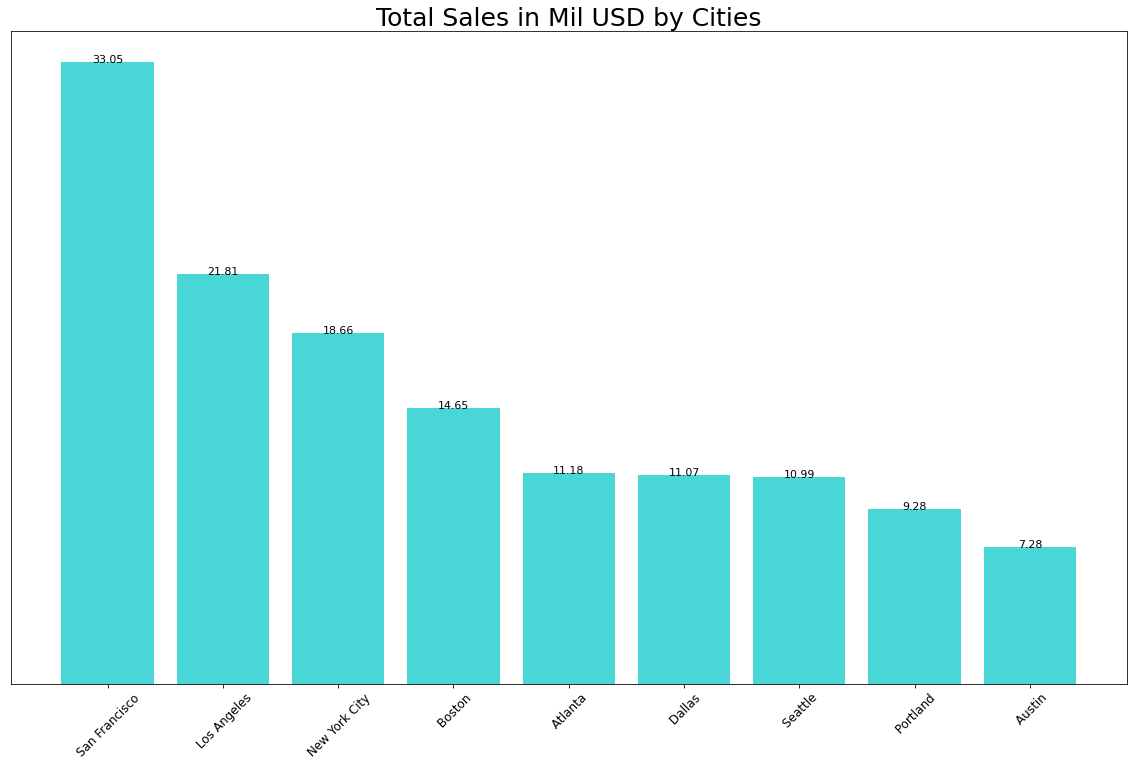

In [133]:
cities = [city for city, sales in sales_by_city.items()]
sales = [sales for city, sales in sales_by_city.items()]
plt.figure (figsize = (20,12))
plt.bar(x = cities, height = sales_by_city, color = (0.1, 0.8, 0.8, 0.8))
plt.xticks(cities, rotation = 45, size = 12)
#plt.xlabel('Cities')
for i in range(len(cities)):
    plt.text(i, sales[i], round(sales[i]/10**6,2), ha = 'center', va = 'baseline', fontsize = 11)
plt.title('Total Sales in Mil USD by Cities', size = 25)
plt.yticks([])
#plt.ylabel('Sales in Thousand USD', size = 12)
plt.show()

#### What time should we display ads to maximize the likelihood of customer's buying product?

In [32]:
# Change dtype
df['Order Date'] = pd.to_datetime(df['Order Date'])

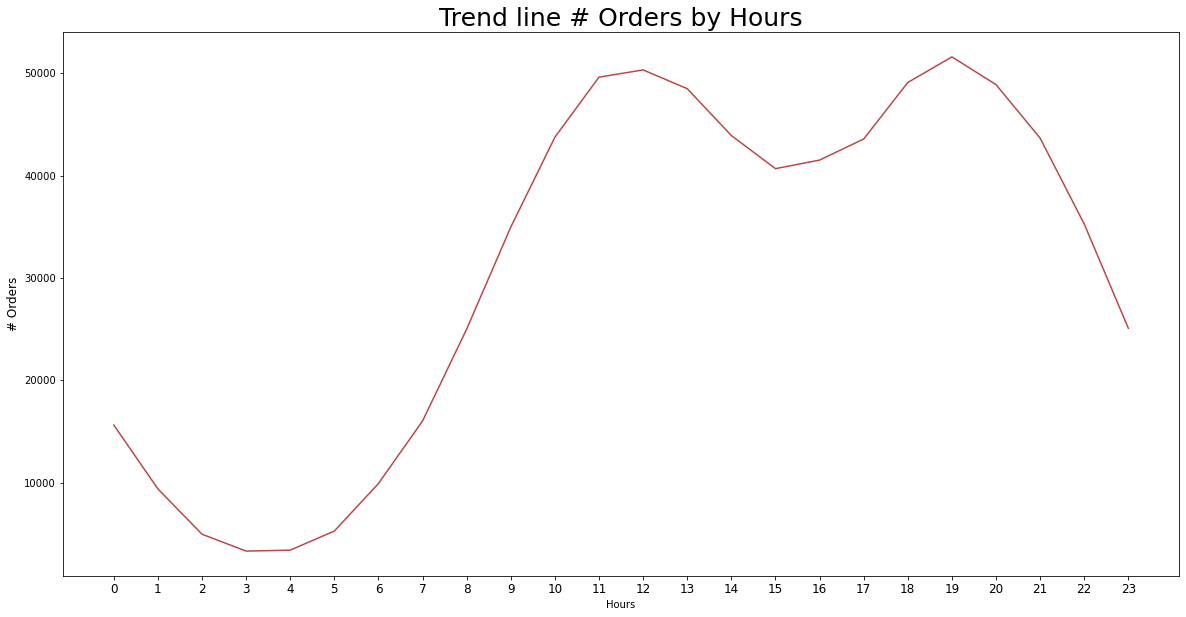

In [132]:
# Visualize
df['Hours'] = df['Order Date'].dt.hour
qty_by_hour = df.groupby('Hours').count()['Order ID']
hours = [hour for hour, qty in qty_by_hour.items()]
plt.figure (figsize = (20,10))
plt.plot(hours, sales_by_hour, color = (0.7, 0.2, 0.2, 0.9))
plt.xticks(hours, rotation = 0,size = 12)
plt.xlabel('Hours')
plt.ylabel('# Orders', size = 12)
plt.title('Trend line # Orders by Hours', size = 25 )
plt.show()

#### What products are most often sold together?

In [114]:
#Find products belong to each Order ID
df_dup = df[df['Order ID'].duplicated(keep = False)]
df_dup[df_dup['Order ID']=='162009'].head(10)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,Quantity Orderd,City,Hours
21759,162009,iPhone,1,700.00,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,1,Austin,20
21760,162009,Lightning Charging Cable,1,14.95,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,1,Austin,20
21761,162009,Wired Headphones,2,11.99,23.98,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,2,Austin,20
271766,162009,iPhone,1,700.00,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,1,Austin,20
271767,162009,Lightning Charging Cable,1,14.95,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,1,Austin,20
271768,162009,Wired Headphones,2,11.99,23.98,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,2,Austin,20
458616,162009,iPhone,1,700.00,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,1,Austin,20
458617,162009,Lightning Charging Cable,1,14.95,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,1,Austin,20
458618,162009,Wired Headphones,2,11.99,23.98,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,2,Austin,20
0,162009,iPhone,1,700.00,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,1,Austin,20


In [115]:
# Create function to join multi rows into one row
group_product = lambda product: ', '.join(product)

In [116]:
df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(group_product)
df_dup[df_dup['Order ID']=='162009'].head(10)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,Quantity Orderd,City,Hours,All Products
21759,162009,iPhone,1,700.00,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,1,Austin,20,"iPhone, Lightning Charging Cable, Wired Headph..."
21760,162009,Lightning Charging Cable,1,14.95,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,1,Austin,20,"iPhone, Lightning Charging Cable, Wired Headph..."
21761,162009,Wired Headphones,2,11.99,23.98,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,2,Austin,20,"iPhone, Lightning Charging Cable, Wired Headph..."
271766,162009,iPhone,1,700.00,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,1,Austin,20,"iPhone, Lightning Charging Cable, Wired Headph..."
271767,162009,Lightning Charging Cable,1,14.95,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,1,Austin,20,"iPhone, Lightning Charging Cable, Wired Headph..."
271768,162009,Wired Headphones,2,11.99,23.98,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,2,Austin,20,"iPhone, Lightning Charging Cable, Wired Headph..."
458616,162009,iPhone,1,700.00,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,1,Austin,20,"iPhone, Lightning Charging Cable, Wired Headph..."
458617,162009,Lightning Charging Cable,1,14.95,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,1,Austin,20,"iPhone, Lightning Charging Cable, Wired Headph..."
458618,162009,Wired Headphones,2,11.99,23.98,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,2,Austin,20,"iPhone, Lightning Charging Cable, Wired Headph..."
0,162009,iPhone,1,700.00,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,1,Austin,20,"iPhone, Lightning Charging Cable, Wired Headph..."


In [117]:
df_dup[['Order ID', 'All Products']].drop_duplicates()

,Order ID,All Products
0,141234,"iPhone, iPhone, iPhone, iPhone"
1,141235,"Lightning Charging Cable, Lightning Charging C..."
2,141236,"Wired Headphones, Wired Headphones, Wired Head..."
3,141237,"27in FHD Monitor, 27in FHD Monitor, 27in FHD M..."
4,141238,"Wired Headphones, Wired Headphones, Wired Head..."
...,...,...
186845,319666,"Lightning Charging Cable, Lightning Charging C..."
186846,319667,"AA Batteries (4-pack), AA Batteries (4-pack), ..."
186847,319668,"Vareebadd Phone, Vareebadd Phone, Vareebadd Ph..."
186848,319669,"Wired Headphones, Wired Headphones, Wired Head..."


In [118]:
# List out top 10 products are most often sold
df_dup['All Products'].value_counts().head(10)

Lightning Charging Cable, Lightning Charging Cable, Lightning Charging Cable, Lightning Charging Cable            79324
AAA Batteries (4-pack), AAA Batteries (4-pack), AAA Batteries (4-pack), AAA Batteries (4-pack)                    79304
AA Batteries (4-pack), AA Batteries (4-pack), AA Batteries (4-pack), AA Batteries (4-pack)                        79236
USB-C Charging Cable, USB-C Charging Cable, USB-C Charging Cable, USB-C Charging Cable                            79168
Wired Headphones, Wired Headphones, Wired Headphones, Wired Headphones                                            68832
Apple Airpods Headphones, Apple Airpods Headphones, Apple Airpods Headphones, Apple Airpods Headphones            58300
Bose SoundSport Headphones, Bose SoundSport Headphones, Bose SoundSport Headphones, Bose SoundSport Headphones    50020
27in FHD Monitor, 27in FHD Monitor, 27in FHD Monitor, 27in FHD Monitor                                            28852
27in 4K Gaming Monitor, 27in 4K Gaming M

#### What products sold the most? Why do you think it sold the most?

In [119]:
all_products = df.groupby('Product').sum()['Quantity Orderd']
all_products

Product
20in Monitor                   16516.0
27in 4K Gaming Monitor         24976.0
27in FHD Monitor               30200.0
34in Ultrawide Monitor         24796.0
AA Batteries (4-pack)         110540.0
AAA Batteries (4-pack)        124068.0
Apple Airpods Headphones       62644.0
Bose SoundSport Headphones     53828.0
Flatscreen TV                  19276.0
Google Phone                   22128.0
LG Dryer                        2584.0
LG Washing Machine              2664.0
Lightning Charging Cable       92868.0
Macbook Pro Laptop             18912.0
ThinkPad Laptop                16520.0
USB-C Charging Cable           95900.0
Vareebadd Phone                 8272.0
Wired Headphones               82228.0
iPhone                         27396.0
Name: Quantity Orderd, dtype: float64

In [120]:
prices = df.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.989998
27in 4K Gaming Monitor         389.989990
27in FHD Monitor               149.990005
34in Ultrawide Monitor         379.989990
AA Batteries (4-pack)            3.840000
AAA Batteries (4-pack)           2.990000
Apple Airpods Headphones       150.000000
Bose SoundSport Headphones      99.989998
Flatscreen TV                  300.000000
Google Phone                   600.000000
LG Dryer                       600.000000
LG Washing Machine             600.000000
Lightning Charging Cable        14.950000
Macbook Pro Laptop            1700.000000
ThinkPad Laptop                999.989990
USB-C Charging Cable            11.950000
Vareebadd Phone                400.000000
Wired Headphones                11.990000
iPhone                         700.000000
Name: Price Each, dtype: float32

<ipython-input-155-52fd590a9d25>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product_lst, rotation = 90, size = 12)


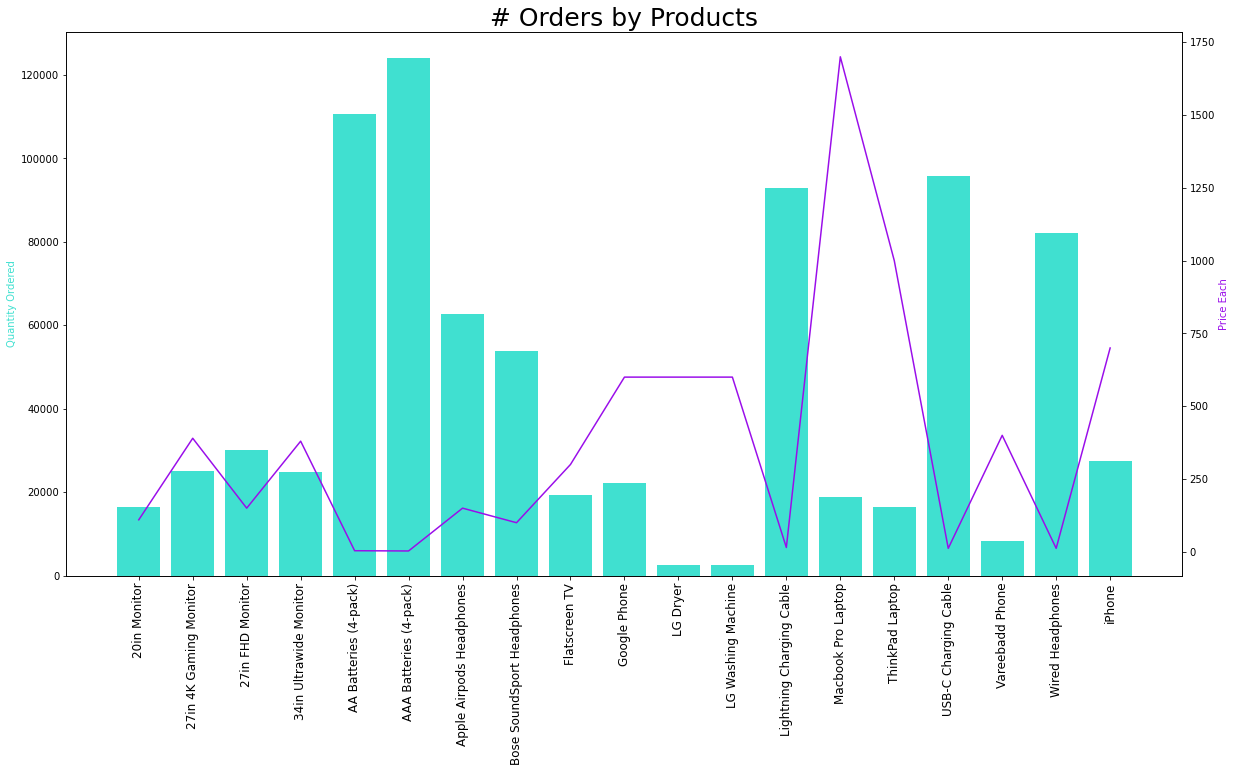

In [155]:
product_lst = [product for product, qty in all_products.items()]

x = product_lst
y1 = all_products
y2 = prices

fig, ax1 = plt.subplots(figsize = (20,10))

ax2 = ax1.twinx()
ax1.bar(x, y1, color = '#40E0D0')
ax2.plot(x, y2, '#9A0EEA')

ax1.set_xticklabels(product_lst, rotation = 90, size = 12)
ax1.set_ylabel('Quantity Ordered', color='#40E0D0')
ax2.set_ylabel('Price Each', color='#9A0EEA')
plt.title ('# Orders by Products', size = 25)
plt.show()
